In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os              # this is to see which dataset is present in your notebook
os.listdir()

['.ipynb_checkpoints',
 '0 All Data Set Head Print.ipynb',
 '1 Outliner Detection all TITANIC scater,z,box,iqr.ipynb',
 '1 python.ipynb',
 '1 Titanic project solution Logistic Regression.ipynb',
 '1 Titanic project.ipynb',
 '1680094088.ipynb',
 '1680094144.ipynb',
 '2 Titanic project solution ALL ALGOS.ipynb',
 'diabetes.csv',
 'drive-download-20230322T073248Z-001.zip',
 'ds_salaries.csv',
 'FOR and WHILE LOOP.ipynb',
 'FUNCTION.ipynb',
 'IF CONDITION.ipynb',
 'linear rgres..of house price predicrtion data.ipynb',
 'LR ON DIBETIES DATA and KNN.ipynb',
 'Machine Learning.ipynb',
 'MAPPING LAMBDA AND FILTER.ipynb',
 'MATPLOTLIB.ipynb',
 'ML(LOGISTIC REGRESSION).ipynb',
 'mtcars.csv',
 'NUMPY PANDAS.ipynb',
 'OUTLINERS PRACTICE.ipynb',
 'panda part 2.ipynb',
 'PANDAS.ipynb',
 'practice sheet for ML.ipynb',
 'practice sheet.ipynb',
 'Python For Loops Assignment .ipynb',
 'Python OOPS.ipynb',
 'real estate dataset.ipynb',
 'Regularization .ipynb',
 'riga_re.csv',
 'sample_submission.csv',
 

In [3]:
data=pd.read_csv("diabetes.csv",encoding_errors="ignore")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.shape[0]

768

In [6]:
data.shape[1]

9

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.Pregnancies.values

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
        7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
       10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
        1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
        1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
        2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
        0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
        4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
        0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
        1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
        6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
        1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
        6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
        2,  7,  7,  1,  1

In [11]:
data.Pregnancies.max()

17

In [12]:
data.Pregnancies.min()

0

In [13]:
data.Pregnancies=data.Pregnancies.astype("object")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# seprate categorical and continuous data

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
def separate_catagorical_and_continuous(data):
    categorical_cols , numerical_cols= [] , []
    for cols in data.columns:
        if data[cols].dtypes=="object":
            categorical_cols.append(cols)
        else:
            numerical_cols.append(cols)
            
    return categorical_cols , numerical_cols 

In [17]:
categorical_cols , numerical_cols=separate_catagorical_and_continuous(data)


In [18]:
categorical_cols

['Pregnancies']

In [19]:
numerical_cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [20]:
data_categorical=data.select_dtypes(include="object")
data_numerical=data.select_dtypes(include="int64")

In [21]:
data_categorical.head()

,Pregnancies
0,6
1,1
2,8
3,1
4,0


In [22]:
data_numerical.head()

,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,148,72,35,0,50,1
1,85,66,29,0,31,0
2,183,64,0,0,32,1
3,89,66,23,94,21,0
4,137,40,35,168,33,1


# UNI-VARIAT ANALYSIS

In [23]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [24]:
data.Pregnancies.value_counts().index

Int64Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 17], dtype='int64')

In [25]:
data.Pregnancies.value_counts().values

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1], dtype=int64)

<AxesSubplot:>

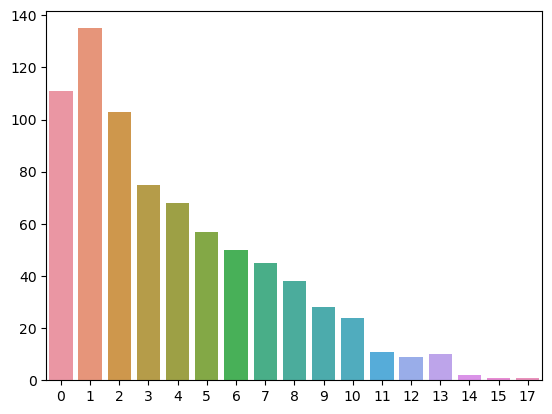

In [26]:
sns.barplot(x=data.Pregnancies.value_counts().index,y=data.Pregnancies.value_counts().values)

In [27]:
def univariat_analysis(data):
    # plot categorical charts which are >> bor and pie
    #plot continuous charts which are >> histogram and boxplot
    for cols in data.columns:
        if data[cols].dtypes=="object":
            plt.figure(figsize=[10,8])
            plt.subplot(1,2,1)
            sns.barplot(x=data[cols].value_counts().index,
                       y=data[cols].value_counts().values,color="blue")
            plt.subplot(1,2,2)
            plt.pie(labels=data[cols].value_counts().index,
                   x=data[cols].value_counts().values,autopct="%1.2f%%")
            plt.title("categorical distribution of {}".format(cols))
            plt.show()
        else:
            plt.figure(figsize=[10,8])
            plt.subplot(1,2,1)
            sns.histplot(x=cols,data=data,color="blue")
            plt.title("continuous distribution of {} ".format(cols))
            
            plt.subplot(1,2,2)
            sns.boxplot(x=cols,data=data,color="blue")
            plt.title("continuous distribution of {} ".format(cols))
            plt.show()

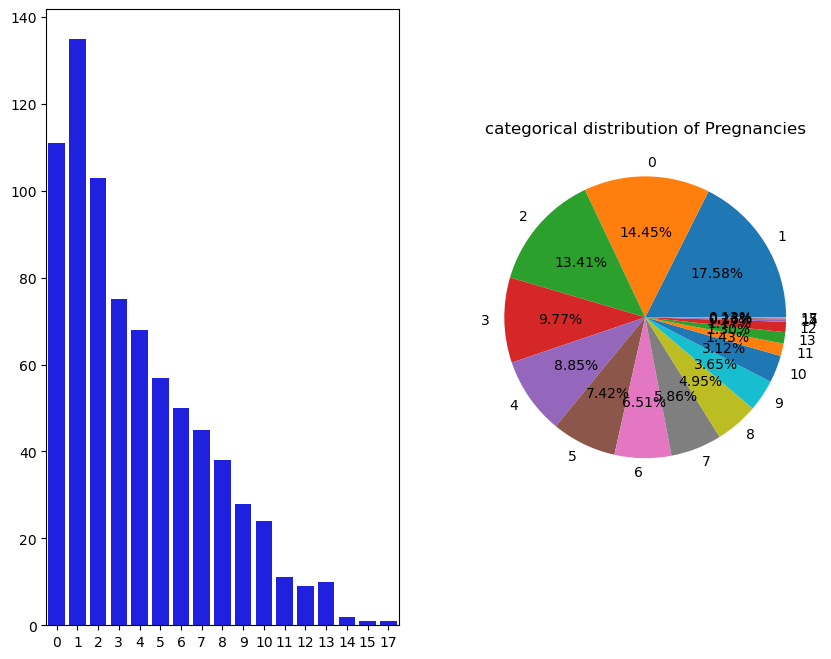

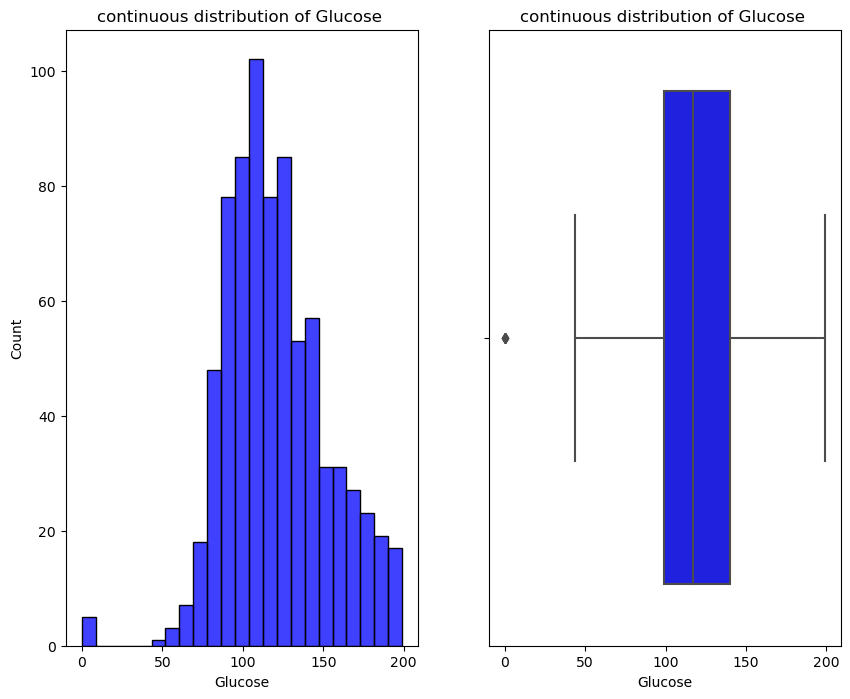

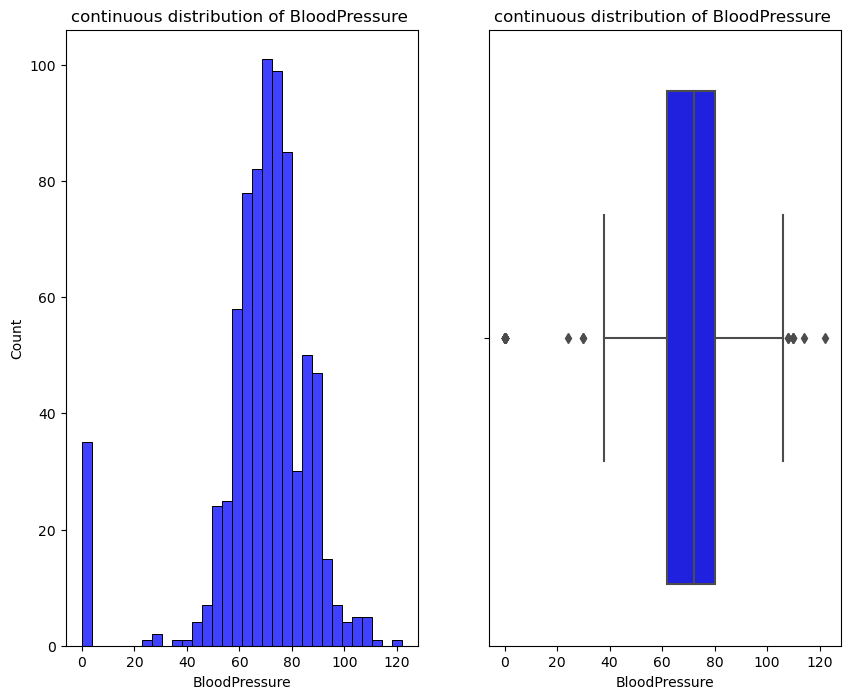

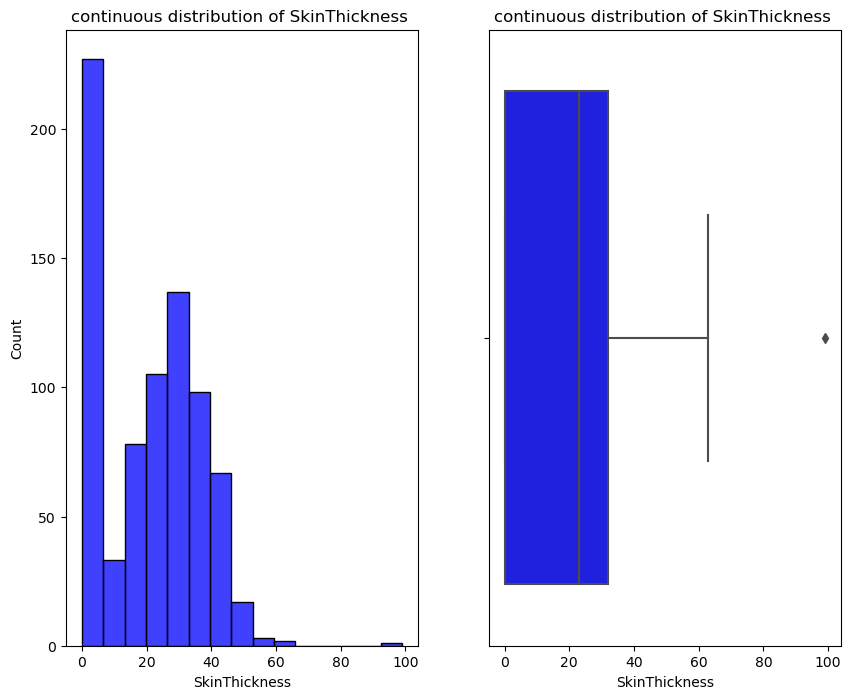

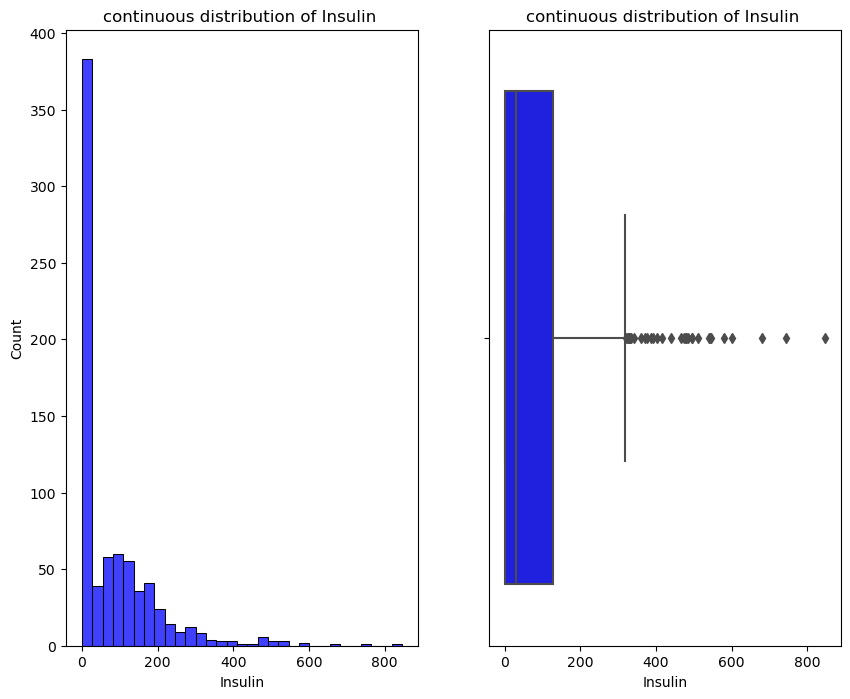

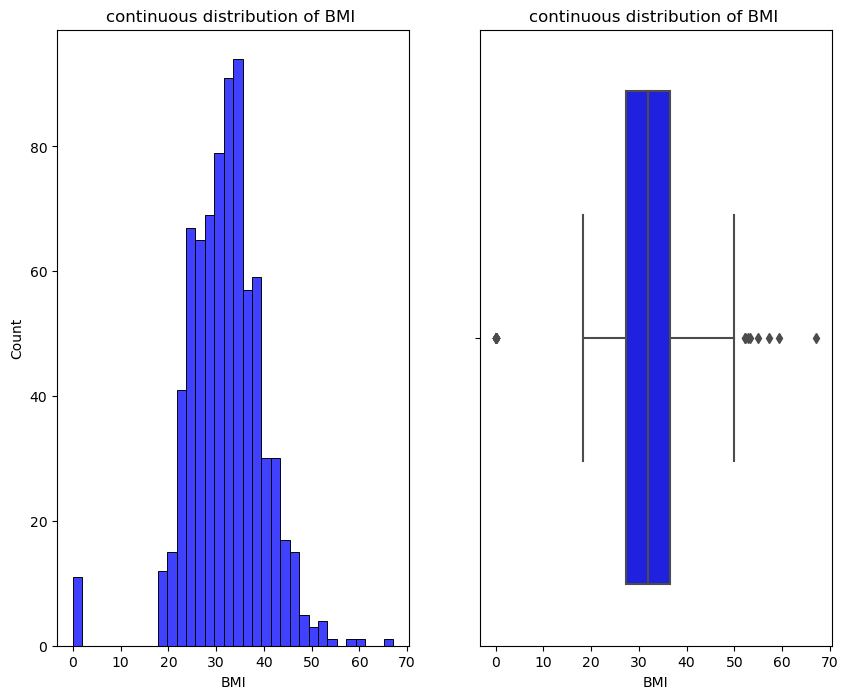

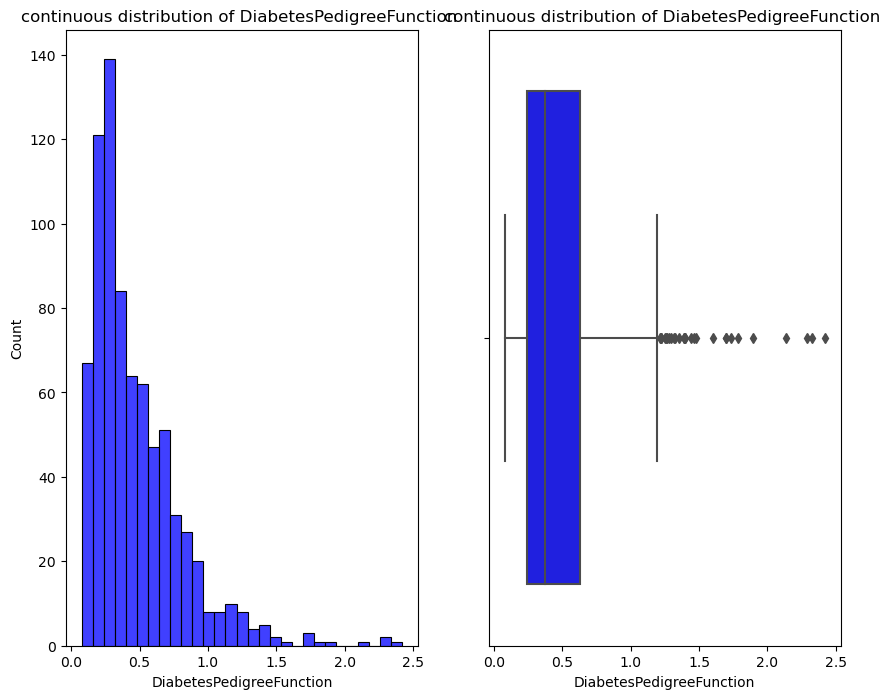

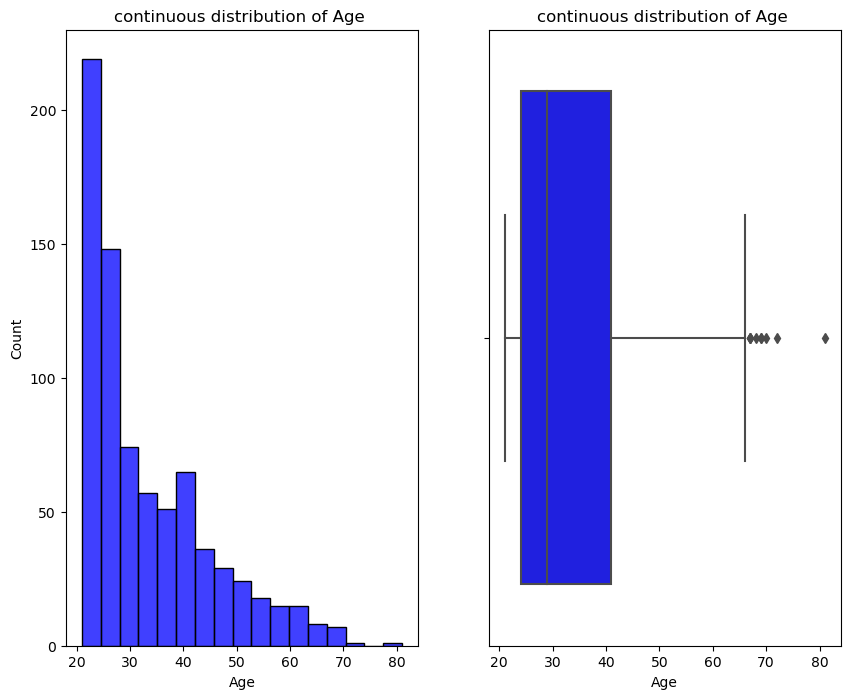

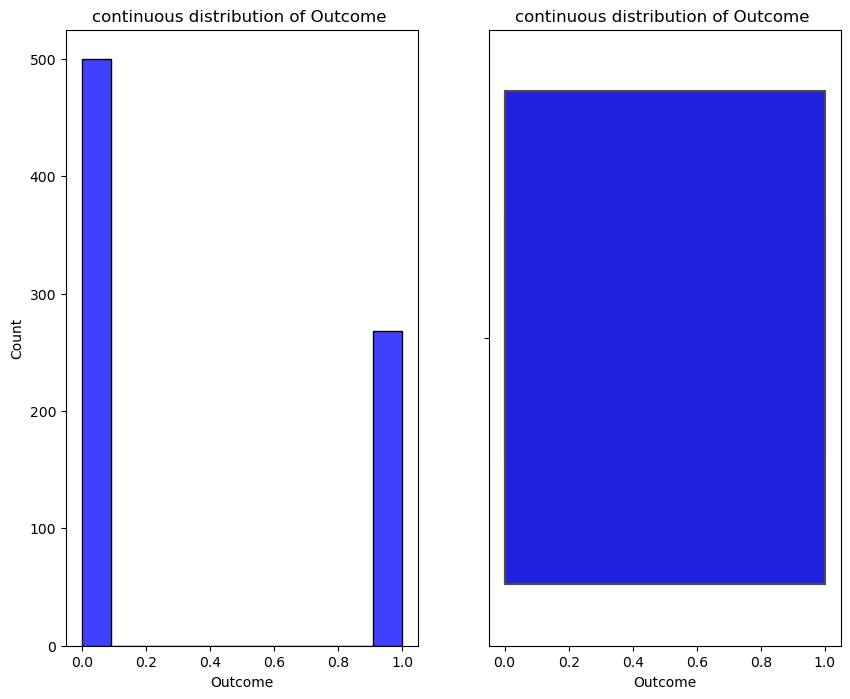

In [28]:
univariat_analysis(data)

# Modeling

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# separeate the features and target
# separate x and y
X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]


In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [32]:
X.shape

(768, 8)

In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
# define train and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
X_train.shape

(614, 8)

In [36]:
X_test.shape

(154, 8)

In [37]:
y_train.shape

(614,)

In [38]:
y_test.shape

(154,)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
#start the training where you tell the model base on x data what is the corresponding y or target

lr.fit(X_train,y_train)

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# predict the data
y_predict=lr.predict(X_test)

In [43]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [44]:
y_test.values

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [45]:
#checking the accuracy

from sklearn.metrics import accuracy_score
print(" the accuracy score of model is ",accuracy_score(y_predict,y_test)*100)


 the accuracy score of model is  77.92207792207793


# KNN

In [46]:
# defining the KNN model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#Begin training 

knn.fit(X_train,y_train)

#Getting Prediction 

y_pred=knn.predict(X_test)



C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
print(" the accuracy score of model is ",accuracy_score(y_pred,y_test)*100)


 the accuracy score of model is  71.42857142857143


In [49]:
variance= 100-accuracy_score(y_pred,y_test)*100
variance

28.57142857142857

In [50]:
from sklearn.metrics import classification_report
cls_report=classification_report(y_pred,y_test)

In [51]:
print(cls_report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       106
           1       0.54      0.58      0.56        48

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.72      0.71      0.72       154



In [52]:
from sklearn.neighbors import KNeighborsClassifier
k_list=range(1,11)
variance_list= []
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    variance= 100-accuracy_score(y_pred,y_test)*100
    variance_list.append(variance)
    
    

    


C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [53]:
variance_list

[29.22077922077922,
 24.675324675324674,
 27.272727272727266,
 25.974025974025977,
 28.57142857142857,
 27.272727272727266,
 23.37662337662337,
 24.025974025974023,
 24.675324675324674,
 22.727272727272734]

Text(0, 0.5, 'variance')

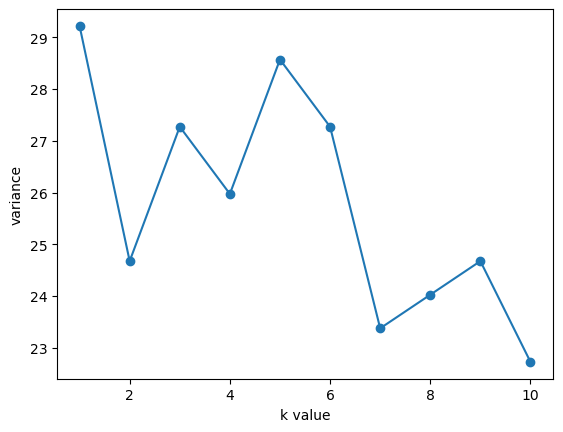

In [54]:
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list)
plt.xlabel("k value")
plt.ylabel("variance")

In [55]:
from sklearn.neighbors import KNeighborsClassifier
k_list=range(1,11)
variance_list= []
bias_list=[]
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    bias= 100-accuracy_score(y_pred_train,y_train)*100
    variance= 100-accuracy_score(y_pred,y_test)*100
    variance_list.append(variance)
    bias_list.append(bias)

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [56]:
print(bias_list,variance_list)

[0.0, 15.798045602605853, 14.657980456026053, 19.21824104234527, 20.68403908794788, 21.498371335504885, 20.84690553745928, 21.17263843648209, 21.335504885993487, 21.82410423452768] [29.22077922077922, 24.675324675324674, 27.272727272727266, 25.974025974025977, 28.57142857142857, 27.272727272727266, 23.37662337662337, 24.025974025974023, 24.675324675324674, 22.727272727272734]


Text(0, 0.5, 'bias')

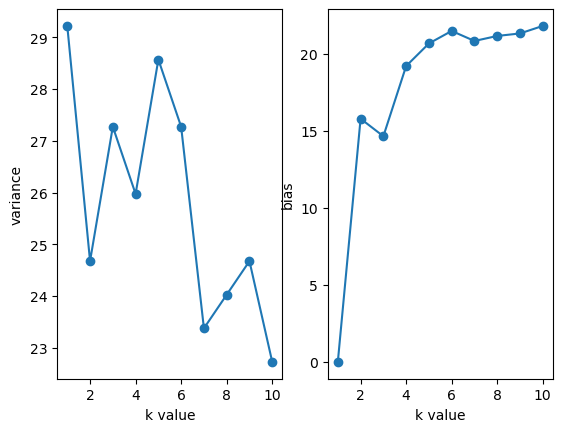

In [57]:
plt.subplot(1,2,1)
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list)
plt.xlabel("k value")
plt.ylabel("variance")

plt.subplot(1,2,2)
plt.scatter(k_list,bias_list)
plt.plot(k_list,bias_list)
plt.xlabel("k value")
plt.ylabel("bias")


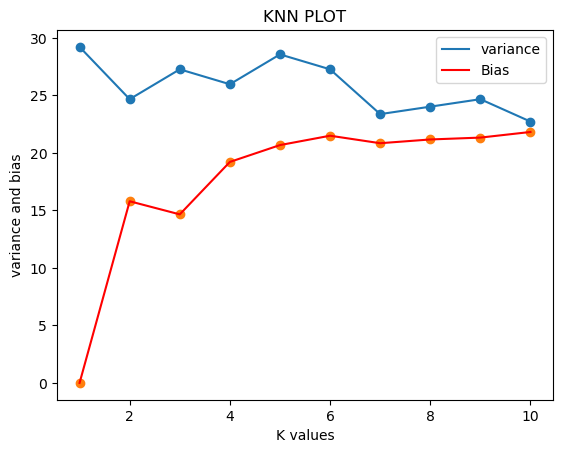

In [58]:
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list,label="variance")
plt.scatter(k_list,bias_list)
plt.plot(k_list,bias_list,color="red",label="Bias")
plt.xlabel("K values")
plt.ylabel("variance and bias")
plt.title("KNN PLOT")
plt.legend()



In [59]:
#now if we increase this k values till 30
from sklearn.neighbors import KNeighborsClassifier
k_list=range(1,31)
variance_list= []
bias_list=[]
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    bias= 100-accuracy_score(y_pred_train,y_train)*100
    variance= 100-accuracy_score(y_pred,y_test)*100
    variance_list.append(variance)
    bias_list.append(bias)


C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dixit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'bias')

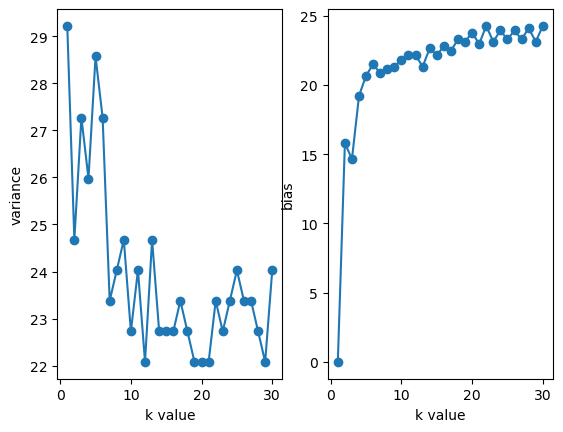

In [60]:
plt.subplot(1,2,1)
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list)
plt.xlabel("k value")
plt.ylabel("variance")

plt.subplot(1,2,2)
plt.scatter(k_list,bias_list)
plt.plot(k_list,bias_list)
plt.xlabel("k value")
plt.ylabel("bias")

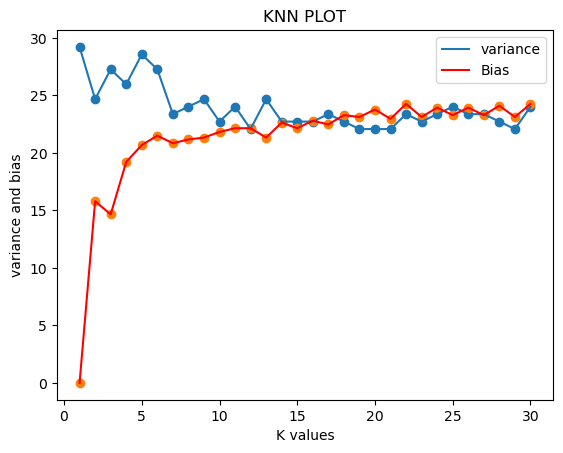

In [61]:
plt.scatter(k_list,variance_list)
plt.plot(k_list,variance_list,label="variance")
plt.scatter(k_list,bias_list)
plt.plot(k_list,bias_list,color="red",label="Bias")
plt.xlabel("K values")
plt.ylabel("variance and bias")
plt.title("KNN PLOT")
plt.legend()



# Regularization

In [62]:
#Modeling

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
model_lin_reg=LinearRegression()
model_ridge=Ridge()
model_lasso=Lasso()
model_els=ElasticNet()
knn=KNeighborsRegressor()
#Start Training

model_lin_reg.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)
model_lasso.fit(X_train,y_train)
model_els.fit(X_train,y_train)
knn.fit(X_train,y_train)


KNeighborsRegressor()

In [65]:
#getting prediction

from sklearn.metrics import r2_score, mean_squared_error as mse

val_score_list= []
train_score_list=[]
models_list=[model_lin_reg,model_ridge,model_lasso,model_els,knn]

for mymodel in models_list:
    pred_training=mymodel.predict(X_train)
    pred_validation=mymodel.predict(X_test)
    rsquared_training=r2_score(pred_training,y_train)
    rsquared_validation=r2_score(pred_validation,y_test)
    
    val_score_list.append(rsquared_validation)
    train_score_list.append(rsquared_training)
    
    

In [78]:
final_view=pd.DataFrame({"models_list":["model_lin_reg","model_ridge","model_lasso","model_els","knn"],
                        "rsquared_training":train_score_list,
                        "rsquared_validation":val_score_list})

In [79]:
final_view

,models_list,rsquared_training,rsquared_validation
0,model_lin_reg,-1.368605,-1.597006
1,model_ridge,-1.371502,-1.599497
2,model_lasso,-4.538525,-3.849369
3,model_els,-3.351798,-2.736458
4,knn,-0.506228,-1.006004


In [80]:
from sklearn.metrics import r2_score, mean_squared_error as mse
from tqdm.notebook import tqdm
val_score_list= []
train_score_list=[]
models_list=[model_lin_reg,model_ridge,model_lasso,model_els,knn]

for mymodel in tqdm(models_list):
    pred_training=mymodel.predict(X_train)
    pred_validation=mymodel.predict(X_test)
    rsquared_training=r2_score(pred_training,y_train)
    rsquared_validation=r2_score(pred_validation,y_test)
    
    val_score_list.append(rsquared_validation)
    train_score_list.append(rsquared_training)
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

# Hyperparameter Tunning 

GridSearch CV

Randomsearch CV

GridSearchCV:

Takes all of the hyperparameters that are passed.

It is going to take a longer time to process.

GridserachCV will return a better accuracy.

RandomSearchCV:


Takes the hyperparameters that are passed at a random.

It is going to take less time to process than gridsearchCV.

RandomSerachCV will return a relatively lesser accuracy than gridsearchCV.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
param_grid_knn = {"n_neighbors":range(5,30),
                  "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
                  "weights":["uniform","distance"]}
grid_search_knn = GridSearchCV(estimator= knn,
                               param_grid= param_grid_knn,
                               n_jobs= -1,
                               scoring= "r2")

NameError: name 'knn' is not defined

In [ ]:
grid_search_knn.fit(X_train,y_train)

In [1]:
grid_search_knn.best_estimator_

NameError: name 'grid_search_knn' is not defined

In [95]:
knn_best = KNeighborsRegressor(algorithm='brute', n_neighbors=22, weights='distance')
knn_best.fit(X_train, y_train)
knn_best_predictions = knn_best.predict(X_test)
knn_best_r2_score = r2_score(y_test, knn_best_predictions)

In [96]:
knn_best_r2_score*100

25.38573830353077

In [97]:
knn_best_predictions_train = knn_best.predict(X_train)
knn_best_train_r2_score = r2_score(y_train, knn_best_predictions_train)

In [98]:
knn_best_train_r2_score*100

99.99999999999552

In [100]:
param_grid_knn = {"n_neighbors":range(5,30),
                  "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
                  "weights":["uniform","distance"]}
random_search_knn = RandomizedSearchCV(estimator= knn,
                                       param_distributions= param_grid_knn,
                                       n_jobs= -1,
                                       scoring= "r2")

In [101]:
random_search_knn.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(5, 30),
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [102]:
random_search_knn.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=21, weights='distance')

In [103]:
knn_best_random = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=21, weights='distance')
knn_best_random.fit(X_train, y_train)
knn_best_random_predictions = knn_best_random.predict(X_test)
knn_best_random_r2_score = r2_score(y_test, knn_best_random_predictions)

In [104]:
knn_best_random_r2_score*100

25.301347475703494

In [105]:
knn_best_random_predictions_train = knn_best_random.predict(X_train)
knn_best_random_r2_score_train = r2_score(y_train, knn_best_random_predictions_train)

In [107]:
knn_best_random_r2_score_train*100

100.0